Milestone 1: Data Preparation & Initial Analysis (ClimateScope)

1. Setup Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import plotly.express as px

2. Load Dataset

In [6]:
file_path = r"D:\infosys project\archive\GlobalWeatherRepository.csv"
df = pd.read_csv(file_path)

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (88273, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


3. Inspect Dataset Structure

In [5]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88273 entries, 0 to 88272
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       88273 non-null  object 
 1   location_name                 88273 non-null  object 
 2   latitude                      88273 non-null  float64
 3   longitude                     88273 non-null  float64
 4   timezone                      88273 non-null  object 
 5   last_updated_epoch            88273 non-null  int64  
 6   last_updated                  88273 non-null  object 
 7   temperature_celsius           88273 non-null  float64
 8   temperature_fahrenheit        88273 non-null  float64
 9   condition_text                88273 non-null  object 
 10  wind_mph                      88273 non-null  float64
 11  wind_kph                      88273 non-null  float64
 12  wind_degree                   88273 no

In [6]:
print("\n--- Descriptive Stats ---")
print(df.describe(include="all"))


--- Descriptive Stats ---
         country location_name      latitude     longitude      timezone  \
count      88273         88273  88273.000000  88273.000000         88273   
unique       210           248           NaN           NaN           196   
top     Bulgaria         Kabul           NaN           NaN  Asia/Bangkok   
freq         940           454           NaN           NaN          1763   
mean         NaN           NaN     19.125848     22.172647           NaN   
std          NaN           NaN     24.470798     65.836668           NaN   
min          NaN           NaN    -41.300000   -175.200000           NaN   
25%          NaN           NaN      3.750000     -6.836100           NaN   
50%          NaN           NaN     17.250000     23.316700           NaN   
75%          NaN           NaN     40.400000     50.580000           NaN   
max          NaN           NaN     64.150000    179.220000           NaN   

        last_updated_epoch      last_updated  temperature_ce

In [7]:
# Preview column names
print("\nColumns:", df.columns.tolist())


Columns: ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


4. Check Missing Values & Anomalies

In [8]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone       

In [9]:
# Basic Dataset Summary
summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique(),
    "Min": df.min(numeric_only=True),
    "Max": df.max(numeric_only=True),
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True)
})

print("📊 Dataset Overview:")
display(summary.head(15))  # show first 15 columns


📊 Dataset Overview:


,Data Type,Unique Values,Min,Max,Mean,Median
air_quality_Carbon_Monoxide,float64,3786,-9999.000,38879.398,517.197758,327.100
air_quality_Nitrogen_dioxide,float64,1709,0.000,427.700,15.485259,4.440
air_quality_Ozone,float64,635,0.000,480.700,63.691560,61.000
air_quality_PM10,float64,5263,-1848.150,6037.290,54.275850,22.015
air_quality_PM2.5,float64,3584,0.168,1614.100,26.212169,14.985
air_quality_Sulphur_dioxide,float64,1724,-9999.000,521.330,11.320585,2.405
air_quality_gb-defra-index,int64,10,1.000,10.000,2.770020,2.000
air_quality_us-epa-index,int64,6,1.000,6.000,1.760504,1.000
cloud,int64,101,0.000,100.000,39.467595,27.000
condition_text,object,47,NaN,NaN,NaN,NaN


In [15]:
print(df.columns.tolist())


['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


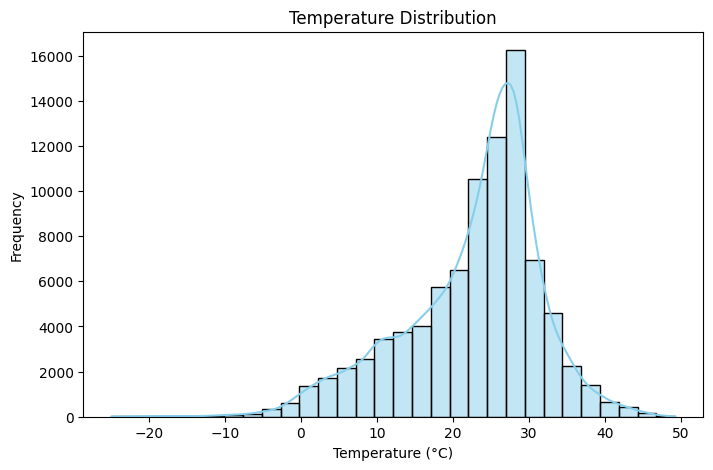

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["temperature_celsius"], bins=30, kde=True, color="skyblue")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


C:\Users\sanke\AppData\Local\Temp\ipykernel_9264\3421794479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


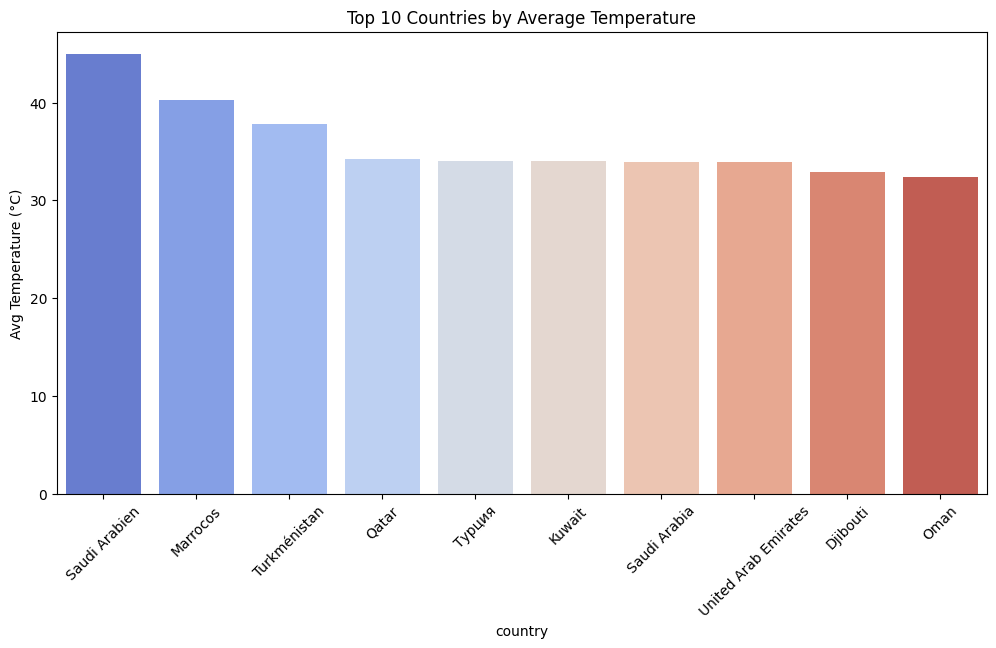

In [16]:
plt.figure(figsize=(12,6))

# Replace with the correct column name
top_countries = df.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries by Average Temperature")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


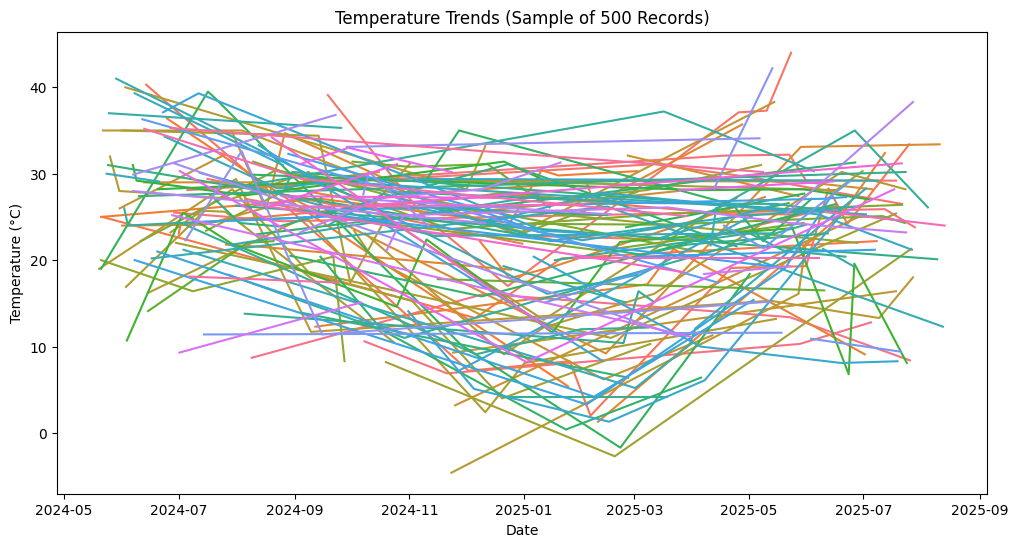

In [24]:
# Convert date column
df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")

plt.figure(figsize=(12,6))
sns.lineplot(x="last_updated", y="temperature_celsius", data=df.sample(500), hue="country", legend=False)
plt.title("Temperature Trends (Sample of 500 Records)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


5. Handle Missing/Inconsistent Data

In [25]:
# Interpolate missing values in temperature_celsius
if "temperature_celsius" in df.columns:
    df["temperature_celsius"] = df["temperature_celsius"].interpolate()

# Drop rows with missing critical fields (last_updated, country)
critical_cols = [col for col in ["last_updated", "country"] if col in df.columns]
df = df.dropna(subset=critical_cols)

print("After cleaning, shape:", df.shape)


After cleaning, shape: (88273, 41)


6. Convert Units & Normalize

In [14]:
# Assume temperature is in Kelvin, convert to Celsius
if "temperature" in df.columns and df['temperature'].max() > 200:
    df['temperature'] = df['temperature'] - 273.15

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns that exist in your dataset
num_cols = [col for col in ["temperature_celsius", "humidity", "precip_mm", "wind_kph"] if col in df.columns]

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Normalized columns:", num_cols)


Normalized columns: ['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph']


7. Aggregation (Daily -> Monthly)

In [39]:
# Ensure last_updated is datetime
df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")

# Create a proper Year-Month datetime column (first day of month)
df["year_month"] = df["last_updated"].dt.to_period("M").dt.to_timestamp()

# Aggregate by Year-Month and Country
monthly_df = (
    df.groupby(["year_month", "country"])
    .mean(numeric_only=True)   # keep only numeric values
    .reset_index()
)

print("\n--- Monthly Aggregated Data ---")
print(monthly_df.head())



--- Monthly Aggregated Data ---
  year_month      country  latitude  longitude  last_updated_epoch  \
0 2024-05-01  Afghanistan     34.52      69.18        1.716478e+09   
1 2024-05-01      Albania     41.33      19.82        1.716478e+09   
2 2024-05-01      Algeria     36.76       3.05        1.716478e+09   
3 2024-05-01      Andorra     42.50       1.52        1.716478e+09   
4 2024-05-01       Angola     -8.84      13.23        1.716478e+09   

   temperature_celsius  temperature_fahrenheit   wind_mph  wind_kph  \
0             0.610066               68.523529   7.164706  0.002675   
1             0.682147               78.164706   8.141176  0.003202   
2             0.688497               79.011765  14.041176  0.006426   
3             0.503691               54.335294   6.147059  0.002121   
4             0.728586               84.364706  12.182353  0.005404   

   wind_degree  ...   gust_kph  air_quality_Carbon_Monoxide  \
0   127.941176  ...  16.141176                  1424.094

8. Save Cleaned Dataset

In [28]:
monthly_df.to_csv("cleaned_weather.csv", index=False)
monthly_df.to_parquet("cleaned_weather.parquet")

print("\n✅ Cleaned dataset saved as CSV & Parquet")



✅ Cleaned dataset saved as CSV & Parquet


9. Initial Visualizations

In [30]:
# Convert Period back to timestamp for Plotly
if "temperature_celsius" in monthly_df.columns:
    # If your monthly_df index is a period, convert it
    if isinstance(monthly_df.iloc[0,0], pd.Period):
        monthly_df["year_month"] = monthly_df["last_updated"].dt.to_timestamp()
    else:
        monthly_df["year_month"] = monthly_df["last_updated"]

    fig = px.line(
        monthly_df.head(500),
        x="year_month",
        y="temperature_celsius",
        color="country",
        title="Temperature Trends (Sample)"
    )
    fig.show()


Milestone 1 Deliverables:
# - Cleaned & preprocessed dataset: cleaned_weather.csv, cleaned_weather.parquet
# - Initial inspection and summary of schema, key variables, and data issues